In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
df = pd.read_csv(r"C:\Users\ASUS DEMO\Desktop\WA_Fn-UseC_-Telco-Customer-Churn.csv")


In [5]:
print(df.head())

   customerID  gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0  7590-VHVEG  Female              0     Yes         No       1           No   
1  5575-GNVDE    Male              0      No         No      34          Yes   
2  3668-QPYBK    Male              0      No         No       2          Yes   
3  7795-CFOCW    Male              0      No         No      45           No   
4  9237-HQITU  Female              0      No         No       2          Yes   

      MultipleLines InternetService OnlineSecurity  ... DeviceProtection  \
0  No phone service             DSL             No  ...               No   
1                No             DSL            Yes  ...              Yes   
2                No             DSL            Yes  ...               No   
3  No phone service             DSL            Yes  ...              Yes   
4                No     Fiber optic             No  ...               No   

  TechSupport StreamingTV StreamingMovies        Contract Pape

In [6]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [7]:
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

In [8]:
df['TotalCharges'] = df['TotalCharges'].fillna(df['TotalCharges'].median())

In [9]:
# The customerID is just an identifier and isn't useful for prediction, so we drop it.
df = df.drop('customerID', axis=1)

In [10]:
#finds all columns that are still 'object' type (text) and creates the new 1/0 columns for them.
df = pd.get_dummies(df)

In [11]:
print(df.head())


   SeniorCitizen  tenure  MonthlyCharges  TotalCharges  gender_Female  \
0              0       1           29.85         29.85           True   
1              0      34           56.95       1889.50          False   
2              0       2           53.85        108.15          False   
3              0      45           42.30       1840.75          False   
4              0       2           70.70        151.65           True   

   gender_Male  Partner_No  Partner_Yes  Dependents_No  Dependents_Yes  ...  \
0        False       False         True           True           False  ...   
1         True        True        False           True           False  ...   
2         True        True        False           True           False  ...   
3         True        True        False           True           False  ...   
4        False        True        False           True           False  ...   

   Contract_One year  Contract_Two year  PaperlessBilling_No  \
0              False  

# model training


In [12]:
X = df.drop(['Churn_No', 'Churn_Yes'], axis=1)

# Split Data for Training and Testing

In [13]:
from sklearn.model_selection import train_test_split

In [14]:
y = df['Churn_Yes']
X = df.drop(['Churn_No', 'Churn_Yes'], axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [15]:
# Print the number of rows in each set to confirm the split.
print(f"Rows in X_train: {len(X_train)}")
print(f"Rows in X_test: {len(X_test)}")
print(f"Rows in y_train: {len(y_train)}")
print(f"Rows in y_test: {len(y_test)}")

Rows in X_train: 5634
Rows in X_test: 1409
Rows in y_train: 5634
Rows in y_test: 1409


In [16]:
from sklearn.preprocessing import StandardScaler

Scale Numerical Features

In [20]:
# Define numerical columns
numerical_cols = ['SeniorCitizen', 'tenure', 'MonthlyCharges', 'TotalCharges']

# Create scaler instance
scaler = StandardScaler()

X_train['TotalCharges'] = pd.to_numeric(X_train['TotalCharges'], errors='coerce')
X_test['TotalCharges'] = pd.to_numeric(X_test['TotalCharges'], errors='coerce')

# Fill missing values with median
X_train['TotalCharges'] = X_train['TotalCharges'].fillna(X_train['TotalCharges'].median())
X_test['TotalCharges'] = X_test['TotalCharges'].fillna(X_train['TotalCharges'].median())

# Now scale
X_train[numerical_cols] = scaler.fit_transform(X_train[numerical_cols])
X_test[numerical_cols] = scaler.transform(X_test[numerical_cols])


In [21]:
print(X_train.head())

      SeniorCitizen    tenure  MonthlyCharges  TotalCharges  gender_Female  \
2142      -0.437749 -0.465683       -0.000474     -0.421345           True   
1623      -0.437749  0.885537        1.074754      1.255888           True   
6074      -0.437749 -1.284605       -1.376499     -1.002151          False   
1362      -0.437749 -1.161766        0.177346     -0.907292          False   
6754      -0.437749 -1.325551       -0.098524     -0.394513          False   

      gender_Male  Partner_No  Partner_Yes  Dependents_No  Dependents_Yes  \
2142        False        True        False          False            True   
1623        False        True        False           True           False   
6074         True       False         True           True           False   
1362         True        True        False           True           False   
6754         True        True        False          False            True   

      ...  StreamingMovies_Yes  Contract_Month-to-month  Contract_On

# LogisticRegression

In [22]:
from sklearn.linear_model import LogisticRegression

In [23]:
# Create an instance of the model
# max_iter=1000 ensures it has enough iterations to find the best solution
model = LogisticRegression(max_iter=1000)
# Train the model on your training data. This is the 'learning' step.
model.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

In [24]:
# Use the trained model to make predictions on the test set.
predictions = model.predict(X_test)

print(predictions[:10])

[ True False False  True False False False False False False]


We need to compare the model's predictions to the actual answers, which are stored in y_test. This will tell us the final accuracy of our model.



In [25]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt


In [26]:
#  Calculate Accuracy
accuracy = accuracy_score(y_test, predictions)
print(f"Overall Accuracy: {accuracy:.4f}\n")


#    2. Get the Classification Report  
# This gives a detailed breakdown of the model's performance
print(" Classification Report ")
print(classification_report(y_test, predictions))



Overall Accuracy: 0.8211

 Classification Report 
              precision    recall  f1-score   support

       False       0.86      0.90      0.88      1036
        True       0.69      0.60      0.64       373

    accuracy                           0.82      1409
   macro avg       0.77      0.75      0.76      1409
weighted avg       0.82      0.82      0.82      1409



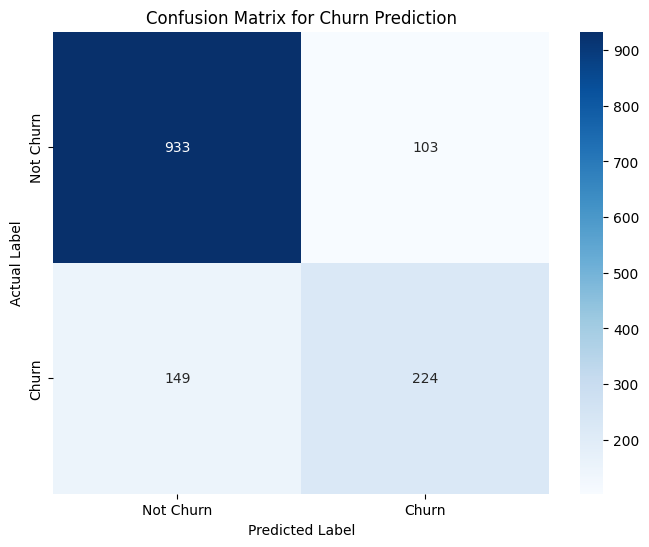

In [27]:

#  3. Create a Confusion Matrix 
# This helps visualize the performance
conf_matrix = confusion_matrix(y_test, predictions)

# Plot the confusion matrix for a nice visual
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Not Churn', 'Churn'],
            yticklabels=['Not Churn', 'Churn'])
plt.title('Confusion Matrix for Churn Prediction')
plt.ylabel('Actual Label')
plt.xlabel('Predicted Label')
plt.show()

# RANDOM FOREST

In [28]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

In [29]:
# --- 1. Create and Train the Random Forest Model ---
rf_model = RandomForestClassifier(n_estimators=100, random_state=42, n_jobs=-1)


In [30]:
# Train the model on the same training data
print("Training the Random Forest model...")
rf_model.fit(X_train, y_train)


Training the Random Forest model...


RandomForestClassifier(n_jobs=-1, random_state=42)

In [31]:


# --- 2. Make Predictions with the New Model ---
rf_predictions = rf_model.predict(X_test)


In [32]:



# --- 3. Evaluate the Random Forest Model ---
print("\n--- Random Forest Model Performance ---")

# Calculate Accuracy
rf_accuracy = accuracy_score(y_test, rf_predictions)


# Get the Classification Report

print(classification_report(y_test, rf_predictions))



--- Random Forest Model Performance ---
              precision    recall  f1-score   support

       False       0.83      0.91      0.87      1036
        True       0.66      0.47      0.55       373

    accuracy                           0.80      1409
   macro avg       0.75      0.69      0.71      1409
weighted avg       0.78      0.80      0.79      1409



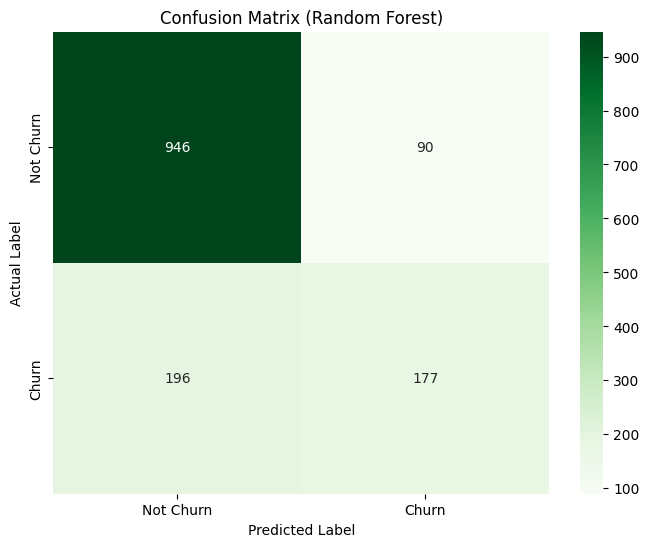

In [33]:
rf_conf_matrix = confusion_matrix(y_test, rf_predictions)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(rf_conf_matrix, annot=True, fmt='d', cmap='Greens',
            xticklabels=['Not Churn', 'Churn'],
            yticklabels=['Not Churn', 'Churn'])
plt.title('Confusion Matrix (Random Forest)')
plt.ylabel('Actual Label')
plt.xlabel('Predicted Label')
plt.show()

--- Top 10 Features (Random Forest) ---
TotalCharges                      0.164168
tenure                            0.141796
MonthlyCharges                    0.137246
Contract_Month-to-month           0.045486
PaymentMethod_Electronic check    0.032350
OnlineSecurity_No                 0.031956
InternetService_Fiber optic       0.028439
TechSupport_No                    0.023705
SeniorCitizen                     0.019924
gender_Male                       0.018246
dtype: float64


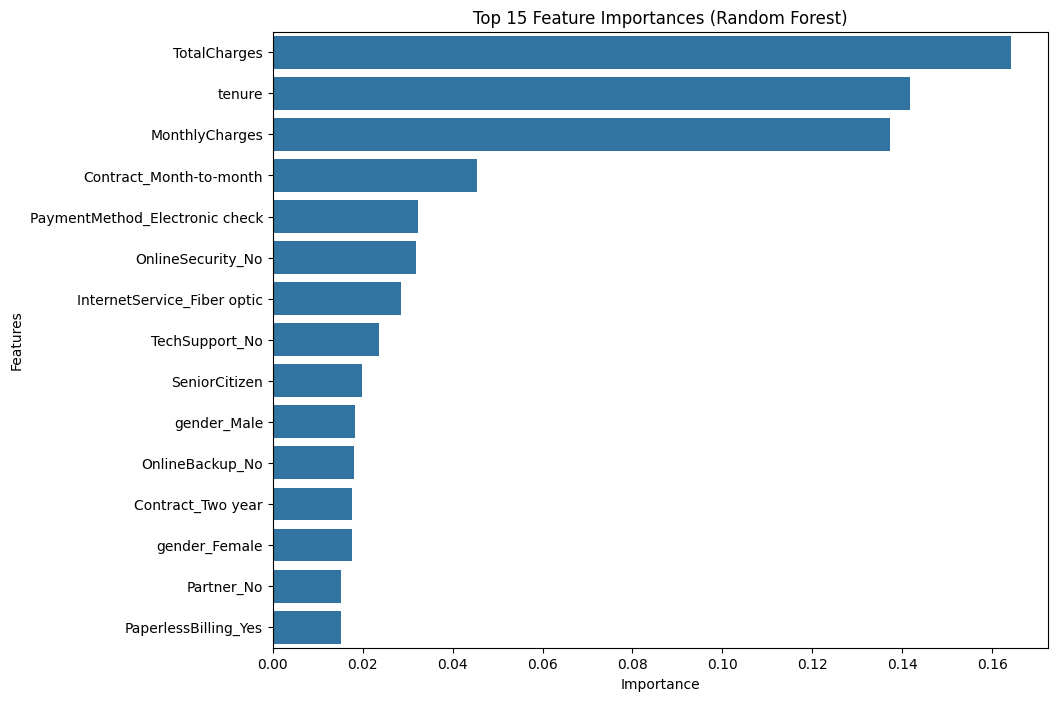

In [34]:
# Get the feature importances from the trained Random Forest model
importances = rf_model.feature_importances_
feature_names = X_train.columns

# Create a DataFrame for better visualization
forest_importances = pd.Series(importances, index=feature_names).sort_values(ascending=False)

# Print the top 10 most important features
print("--- Top 10 Features (Random Forest) ---")
print(forest_importances.head(10))

# Plot the feature importances to create a nice visual
plt.figure(figsize=(10, 8))
sns.barplot(x=forest_importances.head(15), y=forest_importances.head(15).index)
plt.title('Top 15 Feature Importances (Random Forest)')
plt.xlabel('Importance')
plt.ylabel('Features')
plt.show()

# tuning

In [36]:
from sklearn.model_selection import GridSearchCV

# Define the settings (hyperparameters) we want to test
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [10, 20, None],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]
}

In [37]:
# Create a new Random Forest model
rf_tuned = RandomForestClassifier(random_state=42)


In [39]:
# Set up the Grid Search
# cv=3 means it will use 3-fold cross-validation
# n_jobs=-1 uses all available computer cores to speed things up
grid_search = GridSearchCV(estimator=rf_tuned, param_grid=param_grid,
                           cv=3, n_jobs=-1, verbose=2, scoring='recall')

In [40]:
# Run the Grid Search on our training data
print("Starting Grid Search... this may take a few minutes.")
grid_search.fit(X_train, y_train)

Starting Grid Search... this may take a few minutes.
Fitting 3 folds for each of 24 candidates, totalling 72 fits


GridSearchCV(cv=3, estimator=RandomForestClassifier(random_state=42), n_jobs=-1,
             param_grid={'max_depth': [10, 20, None],
                         'min_samples_leaf': [1, 2],
                         'min_samples_split': [2, 5],
                         'n_estimators': [100, 200]},
             scoring='recall', verbose=2)

In [41]:

# Print the best settings found
print("\nBest parameters found:")
print(grid_search.best_params_)

# Now, let's evaluate the best model found by the grid search
best_rf_model = grid_search.best_estimator_
tuned_predictions = best_rf_model.predict(X_test)

print("\n--- Tuned Random Forest Model Performance ---")
print(classification_report(y_test, tuned_predictions))


Best parameters found:
{'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 200}

--- Tuned Random Forest Model Performance ---
              precision    recall  f1-score   support

       False       0.84      0.91      0.88      1036
        True       0.69      0.53      0.60       373

    accuracy                           0.81      1409
   macro avg       0.77      0.72      0.74      1409
weighted avg       0.80      0.81      0.80      1409



Key Takeaways
Tuning Helped: Tuning the Random Forest did improve its recall (from 0.43 to 0.47). This shows that the process worked!

The Simpler Model is Still Winning: This is a key finding for your project. The simple, baseline Logistic Regression model is still the best at identifying customers who will churn.

The likely reason for this is class imbalance. Since there are many more "No Churn" customers than "Churn" customers in the data, the models are biased towards predicting "No Churn".

# XgBOOST

In [47]:
import xgboost as xgb
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


In [43]:
# This is the ratio of the number of negative class (No Churn) to the positive class (Churn)
scale_pos_weight = np.sum(y_train == 0) / np.sum(y_train == 1)
print(f"Calculated scale_pos_weight: {scale_pos_weight:.2f}")

Calculated scale_pos_weight: 2.77


In [52]:
gb_model = xgb.XGBClassifier(
    objective='binary:logistic',
    eval_metric='logloss',
    scale_pos_weight=scale_pos_weight,
    random_state=42
)


In [54]:
print("\nTraining the XGBoost model...")
gb_model.fit(X_train, y_train)
print("Training complete!")


Training the XGBoost model...
Training complete!


making predictions


In [57]:
gb_predictions = gb_model.predict(X_test)

# Calculate Accuracy

In [59]:
xgb_accuracy = accuracy_score(y_test, gb_predictions)

In [61]:
# Get the Classification Report
print("--- Classification Report ---")
print(classification_report(y_test, gb_predictions))

--- Classification Report ---
              precision    recall  f1-score   support

       False       0.88      0.80      0.84      1036
        True       0.56      0.69      0.62       373

    accuracy                           0.77      1409
   macro avg       0.72      0.75      0.73      1409
weighted avg       0.79      0.77      0.78      1409



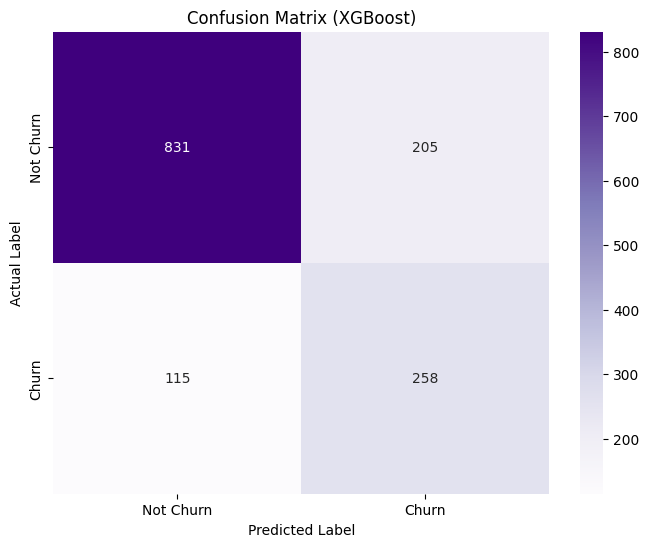

In [63]:

# --- 5. Create a Confusion Matrix ---
xgb_conf_matrix = confusion_matrix(y_test, gb_predictions)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(xgb_conf_matrix, annot=True, fmt='d', cmap='Purples',
            xticklabels=['Not Churn', 'Churn'],
            yticklabels=['Not Churn', 'Churn'])
plt.title('Confusion Matrix (XGBoost)')
plt.ylabel('Actual Label')
plt.xlabel('Predicted Label')
plt.show()
